# Bi-LSTM (Custom Embeddings)

### Libraries

In [1]:
import process_funcs as pf

import os
import pandas as pd
import numpy as np
import gensim

### Parameters

In [2]:
max_len = 500 # maximum length of input vectors
max_words = 15000 # top n words in vocab 

### Reading Data

In [3]:
train_x, test_x, train_y, test_y, label_map  = pf.get_train_test()

In [4]:
#Sample instance
train_x[0][0:200]

['mps',
 'tout',
 'lords',
 'replacement',
 'plan',
 'group',
 'mps',
 'tried',
 'raise',
 'pressure',
 'tony',
 'blair',
 'reform',
 'house',
 'lords',
 'publishing',
 'detailed',
 'blueprint',
 'change',
 'cross',
 'party',
 'group',
 'unveiled',
 'draft',
 'bill',
 'proposing',
 'smaller',
 'second',
 'chamber',
 '70',
 'members',
 'would',
 'elected',
 'mps',
 'peers',
 'failed',
 'agree',
 'reform',
 'since',
 '1999',
 '600',
 'hereditaries',
 'lost',
 'seats',
 'group',
 'says',
 'win',
 'support',
 'removing',
 'last',
 '92',
 'hereditaries',
 'government',
 'postponed',
 'plans',
 'remove',
 'remaining',
 'hereditary',
 'peers',
 'said',
 'unlikely',
 'succeed',
 'opposition',
 'lords',
 'tony',
 'blair',
 'argued',
 'needs',
 'consensus',
 'reforms',
 'suggestions',
 'proposals',
 'changing',
 'least',
 'powers',
 'lords',
 'labour',
 'manifesto',
 'party',
 'group',
 'including',
 'tories',
 'ken',
 'clarke',
 'sir',
 'george',
 'young',
 'labour',
 'robin',
 'cook',
 'tony',

### Data Processing

In [5]:
train_x, tokenizer = pf.lstm_build_sequences(train_x, max_words, max_len)
test_x, tokenizer = pf.lstm_build_sequences(test_x, max_words, max_len, tokenizer=tokenizer)
word_index = tokenizer.word_index

list(word_index.items())[:5]

[('said', 1), ('mr', 2), ('would', 3), ('year', 4), ('also', 5)]

### Embeddings: Custom

Using custom trained Word2Vec embeddings (on train_x set), *obtain document vectors by taking the average of all found word vectors.* 

In [6]:
#Custom embeddings
embeddings_index = pf.get_custom_embeddings()
embeddings_index['test']

array([-2.90044099e-01,  3.59430015e-01,  2.48870715e-01, -2.82393415e-02,
        1.41623110e-01, -8.19525063e-01,  2.65341699e-01,  9.85383213e-01,
       -3.41951907e-01, -3.67978811e-01, -3.71961445e-01, -7.59894550e-01,
       -1.44224748e-01,  3.28498483e-01,  1.09700061e-01, -4.06162053e-01,
        3.44611891e-02, -5.55934727e-01,  1.05890691e-01, -1.02582669e+00,
        9.64341983e-02,  4.67433631e-01,  2.92174608e-01, -2.41391033e-01,
        1.74294729e-02, -5.82534149e-02, -3.85833681e-01, -6.68074787e-02,
       -4.87894446e-01,  3.07648517e-02,  2.60165840e-01,  1.24028340e-01,
        3.38057876e-02, -3.44380796e-01, -1.49403095e-01,  3.88319135e-01,
       -2.96244696e-02, -5.40337443e-01, -1.06616601e-01, -8.14761877e-01,
        2.59913713e-01, -4.67677951e-01, -2.61597395e-01, -2.17816103e-02,
        3.42463166e-01, -3.88499916e-01, -4.27326769e-01, -5.06307296e-02,
        3.58640820e-01,  2.96276063e-01,  7.20875803e-03, -5.05444229e-01,
       -3.69120389e-01, -

In [7]:
embedding_dim, embedding_mat = pf.lstm_build_embed_mat(embeddings_index, word_index, max_words)

### Modeling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(5, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
Total params: 1,661,805
Trainable params: 1,661,805
Non-trainable params: 0
_________________________________________________________________


Train on 1072 samples, validate on 120 samples
Epoch 1/50
1072/1072 [==============================] - 7s 6ms/sample - loss: 1.5930 - acc: 0.2584 - val_loss: 1.5566 - val_acc: 0.3500
Epoch 2/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.6187 - acc: 0.2481 - val_loss: 1.5822 - val_acc: 0.3417
Epoch 3/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.5601 - acc: 0.2743 - val_loss: 1.4969 - val_acc: 0.3500
Epoch 4/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.4418 - acc: 0.3722 - val_loss: 1.5145 - val_acc: 0.2333
Epoch 5/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.5094 - acc: 0.3060 - val_loss: 1.3892 - val_acc: 0.4083
Epoch 6/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.3533 - acc: 0.4011 - val_loss: 1.6251 - val_acc: 0.3667
Epoch 7/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.4980 - acc: 0.3442 - val_loss: 1.4296 - val_acc: 0.3833
E

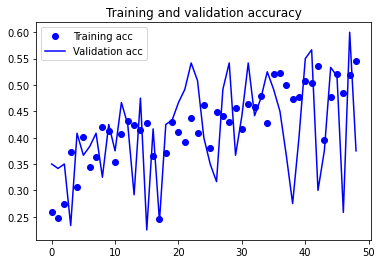

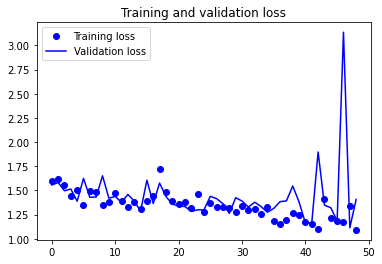

In [9]:
#Training
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import Callback, EarlyStopping

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
earlystopping = EarlyStopping(monitor = "val_loss", 
                                mode = "min", patience = 15, 
                                restore_best_weights = True)
history = model.fit(train_x, train_y.values,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[earlystopping])
accuracy, f1_score = pf.lstm_plot(model, history, test_x, test_y)

In [11]:
pf.store_results('bilstm', 'custom', model, accuracy, f1_score, tf_model=1)

INFO:tensorflow:Assets written to: models/bilstm-custom\assets
